In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Import raw csv file
file = 'Resources/statepoliciesbymodel.csv'
raw_df = pd.read_csv(file)
raw_df.loc[raw_df['state'] == 'Colorado']

,state,statecode,year,time,makemodel,evtype,vehiclepurchaseincentive_dummy,vehiclepurchaseincentive_amount,homechargersubsidy_dummy,homechargersubsidy_amount,...,annualfee_dummy,annualfee_amount,annualfee_pvamount,tou_dummy,designatedparking_dummy,freeparking_dummy,Subsidies_excludinghov,Index_includinghov,Subsidies,Index
1920,Colorado,CO,2010,2010h1,Bmw Active E,bev,0,0.0,1,200,...,0,0,0.0000,0,0,0,200.0000,0,200.0000,0
1921,Colorado,CO,2010,2010h1,Bmw I3,bev,0,0.0,1,200,...,0,0,0.0000,0,0,0,200.0000,0,200.0000,0
1922,Colorado,CO,2010,2010h1,Bmw I3REx,phev,0,0.0,1,200,...,0,0,0.0000,0,0,0,200.0000,0,200.0000,0
1923,Colorado,CO,2010,2010h1,Bmw I8,phev,0,0.0,1,200,...,0,0,0.0000,0,0,0,200.0000,0,200.0000,0
1924,Colorado,CO,2010,2010h1,Bmw X5,phev,0,0.0,1,200,...,0,0,0.0000,0,0,0,200.0000,0,200.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,Colorado,CO,2015,2015h2,Tesla Roadster,bev,1,0.0,0,0,...,1,50,266.4738,0,0,0,-266.4738,0,-266.4738,0
2300,Colorado,CO,2015,2015h2,Toyota Prius Plug-In,phev,1,0.0,0,0,...,1,50,266.4738,0,0,0,-266.4738,0,-266.4738,0
2301,Colorado,CO,2015,2015h2,Toyota Rav4 Ev,bev,1,0.0,0,0,...,1,50,266.4738,0,0,0,-266.4738,0,-266.4738,0
2302,Colorado,CO,2015,2015h2,Toyota Scion,bev,1,0.0,0,0,...,1,50,266.4738,0,0,0,-266.4738,0,-266.4738,0


In [16]:
states = raw_df['state'].unique()
purchase_incentive = []
useful_df = pd.DataFrame(columns = {'state','year','subsidies excluding hov','subsidies'})
# useful_df.append([{'state':'Colorado','year':'2010','incentive amount':2}])
for state in states:
    state_df = raw_df.loc[raw_df['state'] == state]
    years = state_df['year'].unique()
    for year in years:
        year_df = state_df.loc[state_df['year'] == year]
        subsidies_excludinghov = year_df['Subsidies_excludinghov'].sum()
        subsidies = year_df['Subsidies'].sum()
        yearly_df = pd.DataFrame([{'state':state,'year':year,'subsidies excluding hov':subsidies_excludinghov,'subsidies':subsidies}])
        useful_df = pd.concat([useful_df,yearly_df])
useful_df.set_index('state')

,subsidies,year,subsidies excluding hov
state,,,
Alabama,0.0000,2010,0.0000
Alabama,0.0000,2011,0.0000
Alabama,0.0000,2012,0.0000
Alabama,0.0000,2013,0.0000
Alabama,0.0000,2014,0.0000
...,...,...,...
Wyoming,0.0000,2011,0.0000
Wyoming,0.0000,2012,0.0000
Wyoming,0.0000,2013,0.0000


In [17]:
def state_graph(state_list):
    for state in state_list:
        state_df = useful_df.loc[useful_df['state'] == state]
        plt.plot(state_df['year'],state_df['subsidies'])
    plt.legend(state_list,loc='right')

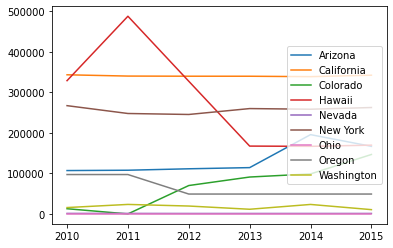

In [18]:
smaller_states = ['Arizona','California','Colorado','Hawaii','Nevada','New York','Ohio','Oregon','Washington']
state_graph(smaller_states)

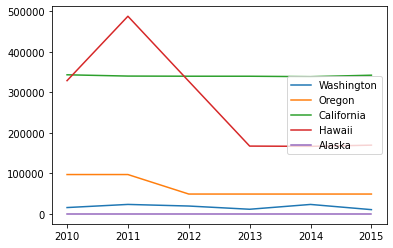

In [20]:
pacific = ['Washington','Oregon','California','Hawaii','Alaska']
state_graph(pacific)

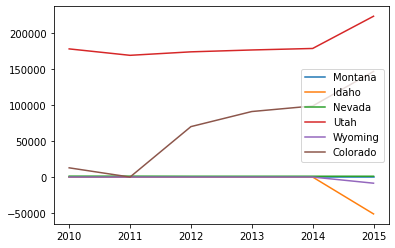

In [21]:
rockies = ['Montana','Idaho','Nevada','Utah','Wyoming','Colorado']
state_graph(rockies)

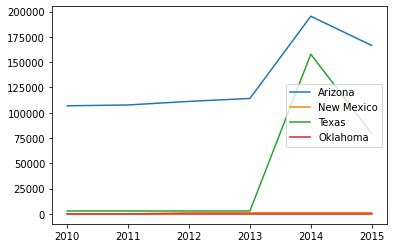

In [22]:
southwest = ['Arizona','New Mexico','Texas','Oklahoma']
state_graph(southwest)

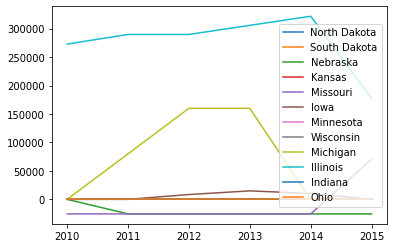

In [23]:
midwest = ['North Dakota','South Dakota','Nebraska','Kansas','Missouri','Iowa','Minnesota','Wisconsin'
           ,'Michigan','Illinois','Indiana','Ohio']
state_graph(midwest)

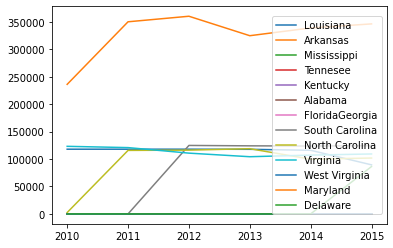

In [24]:
southeast= ['Louisiana','Arkansas','Mississippi','Tennesee','Kentucky','Alabama','Florida'
          'Georgia','South Carolina','North Carolina','Virginia','West Virginia','Maryland','Delaware']
state_graph(southeast)

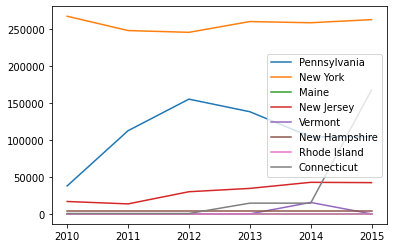

In [25]:
northeast = ['Pennsylvania','New York','Maine','New Jersey','Vermont','New Hampshire',
            'Rhode Island','Connecticut']
state_graph(northeast)